In [0]:
# https://www.datacamp.com/courses/linear-classifiers-in-python

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from scipy.optimize import minimize

In [0]:
# print array in full
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

## 1. Applying logistic regression and SVM

#### Applying logistic regression and SVM

In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.



*   Apply logistic regression and SVM (using SVC()) to the handwritten digits data set using the provided train/validation split.
*   For each classifier, print out the training and validation accuracy.





In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [0]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [0]:
# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9970304380103935
0.9622222222222222


In [0]:
# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0
0.32666666666666666


**Sentiment analysis for movie reviews**

In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the [Large Movie Review Dataset](https://http://ai.stanford.edu/~amaas/data/sentiment/).

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).

In [0]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

In [0]:
# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])
# Probability of positive review: 0.8079007873616059

In [0]:
# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])
# Probability of positive review: 0.5855117402793947

#### Linear classifiers

In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into X, along with binary labels in y.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [0]:
wine = datasets.load_wine()

In [0]:
X = wine.data[:, :2]
print(X.shape)
y = wine.target
print(y.shape)

(178, 2)
(178,)


In [0]:
# print(pd.DataFrame(X).to_string())

In [0]:
# Define the classifiers
classifiers = [LogisticRegression(), 
               LinearSVC(), 
               SVC(), 
               KNeighborsClassifier()]

In [0]:
# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Plot Classifier**

In [0]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [0]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


In [0]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1, lims=lims)
  
  if ax is None:
    plt.figure()
    ax = plt.gca()
    show = True
  else:
    show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax    

In [0]:
def plot_4_classifiers(X, y, clfs):
  # Set-up 2*2 grid for plotting.
  fig, sub = plt.subplots(2, 2)
  plt.subplots_adjust(wspace=0.2, hspace=0.2)
  
  for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
    # clf.fit(X, y)
    plot_classifier(X, y, clf, ax, ticks=True)
    ax.set_title(title)
  plt.show()  

In [0]:
X.shape

(178, 2)

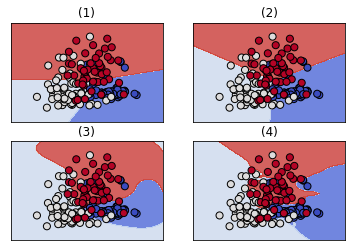

In [0]:
# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

## 2. Loss functions

#### Linear classifiers: the coefficients

When you call fit with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with fit), and visualize the resulting classifiers.

In [0]:
#@title
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [0]:
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Number of errors: 3


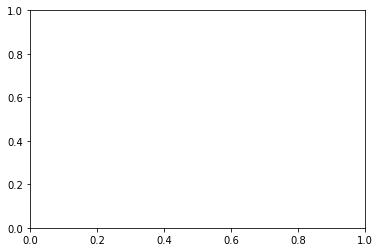

In [0]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

#### What is a loss function?

In [0]:
house = pd.read_csv('/content/boston.csv')
house.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
house.shape

(506, 14)

In [0]:
y = house['MEDV'].values
X = house.drop('MEDV', axis=1).values
print(X.shape)
print(y.shape)

(506, 13)
(506,)


The loss is the square of the difference between the true and predicted y-values (because we want them to be similar).

In [0]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

In [0]:
from scipy.optimize import minimize

In [0]:
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

[-9.28967722e-02  4.87150034e-02 -4.05553520e-03  2.85397111e+00
 -2.86852806e+00  5.92816176e+00 -7.26920487e-03 -9.68510866e-01
  1.71156467e-01 -9.39660543e-03 -3.92190208e-01  1.49055350e-02
 -4.16303289e-01]


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


#### Loss function diagrams

In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

*   Evaluate the log_loss() and hinge_loss() functions at the grid points so that they are plotted.



In [0]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

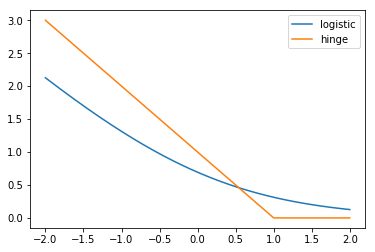

In [0]:
# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

**Implementing logistic regression**

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!).

The log_loss() function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
cancer = datasets.load_breast_cancer()
X_raw = cancer.data # [:,:10] # first 10 features standardized
y = cancer.target
print(X_raw.shape)
print(y.shape)

(569, 30)
(569,)


In [0]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

In [0]:
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

In [0]:
# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

## 3. Logistic regression

#### Logistic regression and regularization

In Chapter 1 you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.

In [0]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=450, random_state=42)
print(X_train.shape)
print(X_valid.shape)

(1347, 64)
(450, 64)




*   Loop over the different values of C_value, creating and fitting a LogisticRegression model each time.

*   Save the error on the training set and the validation set for each model.

*   Create a plot of the training and testing error as a function of the regularization parameter, C.

*   Looking at the plot, what's the best value of C?



In [0]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

In [0]:
# Loop over values of C
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

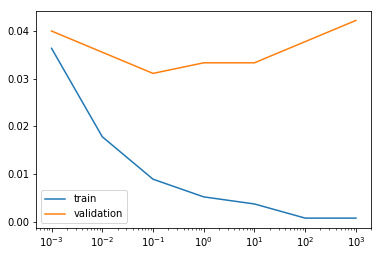

In [0]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

Summary:

Too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting. 

#### Logistic regression and probabilities

In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV(), which was covered in the prerequisite course.



*   Instantiate a logistic regression object that uses L1 regularization.
*   Find the value of C that minimizes cross-validation error.
*   Print out the number of selected features for this value of C.





In [0]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

In [0]:
# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

In [0]:
# Report the best parameters
print("Best CV params", searcher.best_params_)

In [0]:
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

**Identifying the most positive and negative words**

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [0]:
#@title
vocab = np.array(['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this',
       'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on',
       'not', 'you', 'he', 'are', 'his', 'have', 'be', 'one', '!', 'all',
       'at', 'by', 'an', 'who', 'they', 'from', 'so', 'like', 'there',
       'her', 'or', 'just', 'about', 'if', 'has', 'out', 'what', '?',
       'some', 'good', 'more', 'when', 'she', 'very', 'even', 'my', 'no',
       'up', 'time', 'would', 'which', 'only', 'story', 'really', 'their',
       'see', 'had', 'can', 'were', 'me', 'we', 'than', 'well', 'much',
       'been', 'get', 'people', 'will', 'bad', 'other', 'also', 'into',
       'do', 'because', 'great', 'first', 'how', 'him', 'most', "don't",
       'its', 'made', 'then', 'them', 'way', 'make', 'could', 'too',
       'any', 'after', 'movies', 'think', 'characters', 'character',
       'watch', 'films', 'two', 'many', 'seen', 'being', 'acting',
       'never', 'plot', 'little', 'where', 'love', 'best', 'life', 'did',
       'show', 'know', 'does', 'ever', 'here', 'better', 'man', 'your',
       'still', 'end', 'over', 'off', 'these', 'say', 'scene', 'why',
       'while', 'scenes', 'such', 'go', 'something', 'should', 'through',
       'back', "i'm", 'those', 'watching', 'real', 'though', 'now',
       "doesn't", 'thing', 'years', 'actors', 'director', 'another',
       "didn't", 'before', 'nothing', 'new', 'funny', 'actually', 'work',
       'makes', 'find', 'look', 'old', 'few', 'going', 'same', 'again',
       'lot', 'part', 'every', 'cast', 'us', 'world', 'quite', 'want',
       'things', 'pretty', 'young', 'seems', 'around', 'got', 'down',
       'however', "can't", 'fact', 'horror', 'take', 'enough', 'both',
       'may', 'give', 'original', 'between', 'big', 'own', "i've",
       'thought', 'series', 'without', 'right', 'times', 'long', 'always',
       'gets', 'action', 'comedy', "isn't", 'family', 'come', 'point',
       'role', 'saw', 'interesting', 'almost', 'least', 'whole', 'must',
       'bit', 'music', 'script', 'done', 'guy', 'anything', 'minutes',
       'last', 'since', 'might', 'performance', 'far', 'feel', 'probably',
       'am', 'woman', 'kind', 'girl', 'away', 'yet', 'rather', 'worst',
       'sure', 'fun', 'anyone', 'making', 'each', 'played', 'tv', 'found',
       'having', 'day', 'although', 'especially', 'our', 'course',
       'believe', 'comes', 'trying', 'goes', 'hard', 'looks', 'different',
       'place', 'book', 'actor', 'put', 'maybe', 'money', 'someone',
       'ending', 'reason', 'let', 'everything', "wasn't", 'sense', 'once',
       'shows', 'screen', 'dvd', 'true', 'set', 'worth', 'job', 'main',
       'looking', 'watched', 'everyone', 'together', 'three', 'plays',
       'john', 'later', 'said', 'play', 'instead', 'audience', 'seem',
       'beautiful', 'takes', 'effects', 'himself', 'version', 'during',
       'left', 'night', 'house', 'seeing', 'wife', 'special', 'excellent',
       'father', 'american', 'idea', 'else', 'nice', 'shot', 'simply',
       'year', 'read', "you're", 'black', 'high', 'less', 'war', 'star',
       'completely', 'help', 'fan', 'poor', 'death', 'second', 'men',
       'hollywood', 'either', 'mind', 'used', 'given', 'home', 'kids',
       'try', 'performances', 'women', 'enjoy', 'classic', 'boring',
       'short', 'wrong', 'need', 'rest', 'use', 'friends', 'until',
       'along', 'dead', 'truly', 'half', 'production', 'line', 'tell',
       'couple', 'remember', 'next', 'start', 'stupid', 'perhaps', 'came',
       'recommend', 'moments', 'awful', 'wonderful', 'episode', 'mean',
       'understand', 'terrible', 'full', 'camera', 'getting', 'stars',
       'playing', 'video', 'keep', 'sex', 'doing', 'others', 'early',
       'often', 'small', 'definitely', 'gives', 'person', 'school',
       'face', 'perfect', 'name', 'itself', 'become', 'human', 'lines',
       'yes', 'finally', 'dialogue', 'lost', 'felt', 'case', 'piece',
       'top', 'liked', 'supposed', 'children', "couldn't", 'title',
       'absolutely', 'head', 'budget', 'mother', 'live', 'written', 'boy',
       'picture', 'against', 'cinema', 'went', 'worse', 'certainly',
       'entire', 'sort', 'style', 'waste', 'problem', 'mr', 'hope',
       'entertaining', 'overall', 'friend', 'killer', 'evil', 'several',
       'loved', 'fans', 'oh', 'beginning', 'white', 'lives', 'care',
       'becomes', 'direction', 'example', 'already', 'based', 'drama',
       'despite', 'seemed', 'dark', 'throughout', 'unfortunately',
       'wanted', "i'd", 'final', 'history', 'amazing', 'turn', 'fine',
       'laugh', 'michael', 'son', 'humor', 'guess', 'totally', 'lead',
       'sound', 'guys', 'writing', "you'll", 'wants', 'low', 'works',
       'tries', 'called', 'under', 'past', 'viewer', 'quality', 'child',
       'days', 'behind', 'game', 'turns', "they're", 'enjoyed', 'today',
       'able', 'act', 'town', 'favorite', 'kill', 'flick', 'starts',
       'gave', 'actress', 'sometimes', 'eyes', 'etc', 'side', 'horrible',
       'girls', 'genre', 'soon', "won't", 'car', 'brilliant', 'parts',
       'art', 'heart', 'themselves', 'expect', 'kid', 'stuff', 'stories',
       'thinking', 'city', 'obviously', 'directed', 'late', 'myself',
       'blood', 'decent', 'feeling', 'run', 's', 'highly', 'god',
       'except', 'close', 'fight', 'hand', 'anyway', 'roles', 'daughter',
       'killed', 'moment', 'says', 'heard', 'leave', 'matter', 'took',
       'cannot', 'police', 'happens', 'brother', 'hour', 'violence',
       'happened', 'strong', 'particularly', 'james', 'extremely',
       'involved', 'chance', 'writer', 'obvious', 'experience',
       "wouldn't", 'lack', 'including', 'told', 'alone', 'attempt',
       'murder', 'living', 'happen', 'please', 'age', 'wonder',
       'complete', 'ago', 'voice', 'group', 'score', 'david', 'coming',
       'interest', 'save', 'none', 'ok', 'crap', 'type', 'looked',
       'simple', 'slow', 'possible', 'number', 'seriously', 'hell',
       'gore', 'exactly', 'shown', 'king', 'hero', 'annoying', 'song',
       'husband', 'sad', 'whose', 'career', 'yourself', 'cinematography',
       'taken', 'musical', 'ends', 'usually', 'serious', "i'll", 'stop',
       'hours', 'scary', 'released', 'across', 'hilarious', 'running',
       'reality', 'relationship', 'usual', 'ridiculous', 'known', 'hit',
       'opening', 'somewhat', 'started', 'opinion', 'jokes', 'novel',
       'cool', 'change', 'robert', 'wish', 'ones', 'body', 'finds',
       'order', 'saying', 'english', 'huge', 'cut', 'shots', 'episodes',
       'mostly', 'taking', 'female', 'talking', 'strange', 'major',
       'view', 'power', 'happy', 'documentary', 'apparently', 'rating',
       'disappointed', 'level', 'talent', 'call', 'country', 'jack',
       'due', 'events', 'room', 'important', 'songs', 'basically',
       'clearly', 'knows', 'knew', 'supporting', 'attention',
       'television', 'future', 'turned', 'paul', 'easily', 'problems',
       "aren't", 'silly', 'british', 'word', 'tells', 'earth', 'words',
       'local', 'single', 'light', 'four', 'cheap', 'sequence', 'bring',
       'entertainment', 'thriller', 'beyond', 'george', 'miss', 'modern',
       'whether', 'b', 'predictable', 'falls', 'five', 'sets', 'similar',
       'review', 'richard', 'needs', 'upon', 'lady', 'enjoyable',
       'appears', 'romantic', 'comic', 'giving', 'mystery', 'talk',
       'rock', 'message', 'animation', 'within', 'theater', 'sequel',
       'bunch', 'mention', 'herself', 'feels', 'nearly', 'points',
       'theme', 'lee', 'above', 'dull', 'add', 'york', 'ways', 'moving',
       'storyline', 'ten', 'surprised', "haven't", 'lots', 'team',
       'begins', 'middle', 'using', 'fantastic', 'actual', 'sister',
       'effort', 'viewers', 'named', 'among', 'elements', 'easy', 'stay',
       'tom', 'comments', 'avoid', 'showing', 'typical', 'release',
       'clear', 'hate', 'tried', 'peter', 'sorry', 'french', 'dialog',
       'editing', 'tale', 'certain', 'season', 'soundtrack', 'buy',
       'fall', 'general', 'near', 'means', 'famous', 'check', 'parents',
       'red', 'somehow', 'material', 'oscar', 'period', 'form',
       'straight', 'weak', 'working', 'doubt', 'class', 'leads', 'filmed',
       'gone', 'kept', 'greatest', 'figure', 'viewing', 'feature',
       'disney', 'eye', 'realistic', 'brought', 'imagine', 'hear',
       'atmosphere', 'fast', 'particular', 'suspense', 'lame', 'move',
       'whatever', 'sequences', 'america', 'follow', 'indeed', 'die',
       'crime', 'learn', 'eventually', 'reviews', 'wait', 'forget',
       'deal', 'zombie', 'dance', 'space', 'okay', 'premise', 'surprise',
       'believable', 'nature', 'possibly', "you've", 'third', 'decided',
       'subject', 'expected', 'de', 'japanese', 'dr', 'became', 'truth',
       'imdb', 'sexual', 'average', 'stand', 'difficult', 'screenplay',
       'romance', 't', 'sit', 'poorly', 'rent', 'joe', 'nor', 'leaves',
       'question', 'stage', 'note', 'begin', 'killing', 'needed',
       'reading', 'unless', 'baby', 'superb', 'directors', 'society',
       'otherwise', 'shame', 'meet', 'street', 'situation', 'meets',
       'memorable', 'dog', 'credits', 'earlier', 'forced', 'weird',
       'minute', 'older', 'laughs', 'realize', 'emotional', 'jane',
       'beauty', 'writers', 'comment', 'footage', 'write', 'ask', 'badly',
       'interested', 'dramatic', 'sounds', 'whom', 'hot', 'keeps',
       'features', 'directing', 'mess', 'development', 'crazy', 'quickly',
       'male', 'mark', 'towards', 'creepy', 'free', 'monster',
       'perfectly', 'result', 'total', 'plus', 'previous', 'brings',
       'unique', 'plenty', 'worked', 'cheesy', 'effect', 'personal',
       'incredibly', 'hands', 'bill', 'fantasy', 'return', 'dream',
       'apart', 'deep', 'setting', 'admit', 'open', 'appear',
       'background', 'christmas', 'leading', 'doctor', 'casting',
       'hardly', 'meant', 'ben', 'potential', 'boys', 'powerful',
       'business', 'masterpiece', 'fails', 'battle', 'joke', 'create',
       'various', 'forward', 'fire', 'inside', 'outside', 'portrayed',
       'girlfriend', 'ideas', 'twist', 'william', 'missing', 'nudity',
       'reasons', 'villain', 'dumb', 'political', 'deserves', 'match',
       'secret', 'expecting', 'air', 'fairly', 'present', 'gay',
       'fighting', 'unlike', 'married', 'manages', 'break', 'scott',
       'success', 'attempts', 'western', 'spoilers', 'acted', 'remake',
       'pay', 'box', 'recently', 'rich', 'front', 'cute', 'further',
       'cop', 'sadly', 'era', 'copy', 'agree', 'talented', 'telling',
       'sci-fi', 'filmmakers', 'following', 'public', 'crew',
       'incredible', 'missed', 'wasted', 'pure', 'plain', 'brothers',
       'odd', 'caught', 'flat', 'social', 'mentioned', 'pace', 'ended',
       'decides', 'considering', 'waiting', 'members', 'mary', 'large',
       'list', 'sweet', 'revenge', 'popular', 'uses', 'hold', 'slightly',
       'office', 'compared', 'neither', 'wrote', 'escape', 'sees',
       'suddenly', 'e', 'party', 'spirit', 'tension', 'convincing',
       'created', 'fear', 'spent', 'rate', 'cause', 'entirely', 'island',
       'cartoon', 'intelligent', 'credit', 'clever', "we're", 'choice',
       'water', 'kills', 'bored', 'familiar', 'moves', 'tony', 'laughing',
       'gun', 'visual', 'successful', 'ultimately', 'basic', 'band',
       'trouble', 'la', 'cat', 'zombies', 'concept', 'value', 'biggest',
       'positive', 'singing', 'consider', 'exciting', 'dancing',
       'company', 'died', 'recent', 'state', 'language', 'effective',
       'science', 'cover', 'spend', 'portrayal', 'violent', 'cold',
       'appreciate', 'produced', 'speak', 'pointless', 'former', 'studio',
       'amusing', 'adult', 'common', 'filled', 'planet', 'younger',
       'books', 'store', 'walk', 'follows', 'focus', 'solid', 'bizarre',
       'italian', 'impressive', 'animated', 'impossible', 'german',
       'amount', 'tone', 'century', 'adventure', 'conclusion',
       'producers', "weren't", 'showed', 'recommended', 'fit', 'van',
       'depth', 'runs', 'situations', 'chemistry', 'prison', 'project',
       'jim', 'respect', 'awesome', 'control', 'accent', 'hair',
       'considered', 'win', 'won', 'smith', 'force', 'decide', 'college',
       'trip', 'disturbing', 'somewhere', 'mad', 'failed', 'dad',
       'changed', 'leaving', 'questions', 'longer', 'steve', 'audiences',
       'barely', 'aside', 'honest', 'slasher', 'sick', 'ghost',
       'shooting', 'trash', 'images', 'thanks', 'charming', 'starring',
       'generally', 'pathetic', 'literally', 'west', 'values', 'culture',
       'likes', 'fake', 'surprisingly', 'touch', 'magic', 'involving',
       'yeah', 'alive', 'immediately', 'stewart', 'harry', 'south',
       'frank', 'garbage', 'natural', 'utterly', 'camp', 'bought',
       'honestly', 'adaptation', 'sam', 'london', 'aspect', 'pictures',
       'ability', 'detective', 'nobody', 'glad', 'explain', 'fair',
       'computer', 'appearance', 'genius', 'sitting', 'cult', 'attack',
       'master', 'meaning', 'personally', 'stick', 'normal', 'u', 'army',
       'appeal', 'knowing', 'tough', 'remains', 'humour', 'military',
       'nowhere', 'journey', 'added', 'charlie', 'rare', 'thinks',
       'thank', 'dreams', 'c', 'purpose', 'touching', 'unbelievable',
       'comedies', 'week', 'catch', 'taste', 'terms', 'chase',
       'beautifully', 'channel', 'walking', 'sexy', 'batman', 'terrific',
       'twists', 'silent', 'fiction', 'kelly', 'wow', 'standard',
       'equally', 'naked', 'mood', 'subtle', 'mistake', 'managed',
       'complex', 'laughable', 'pick', 'themes', 'road', 'chris',
       'lovely', 'narrative', 'wild', 'disappointing', 'likely', 'brain',
       'costumes', 'thus', 'plan', 'issues', 'excuse', 'club',
       'outstanding', 'soldiers', 'painful', 'producer', 'date',
       'justice', 'surely', 'constantly', 'christopher', 'government',
       'fully', 'self', 'edge', 'law', 'boss', 'presented', 'victim',
       'cinematic', 'contains', 'door', 'places', 'central', 'details',
       'innocent', 'presence', 'climax', 'everybody', 'slowly',
       'marriage', 'besides', 'pass', 'ride', 'manner', 'charles',
       'hoping', 'animals', 'historical', 'charm', 'stunning', 'finish',
       'vampire', 'd', 'photography', 'impression', "you'd", 'henry',
       'loves', 'gang', 'spoiler', 'thrown', 'mysterious',
       'disappointment', 'expectations', 'bottom', 'hey', 'shoot',
       'allen', 'exception', 'paris', 'woods', 'minor', 'makers', 'soul',
       'festival', 'critics', 'aspects', 'stands', 'loud', 'indian',
       'suppose', 'scenery', 'train', 'bother', 'cry', 'church', 'color',
       'feelings', 'sent', 'heavy', 'support', 'emotion', 'bruce',
       'opportunity', 'award', 'hotel', 'brief', 'element', 'filming',
       'mainly', 'ahead', 'fascinating', 'forever', 'blue', 'rated',
       'acts', 'pieces', 'emotions', 'available', 'intended', 'twice',
       'dies', 'building', 'names', 'throw', 'track', 'compelling',
       'serial', 'happening', 'changes', 'drawn', 'hurt', 'don', 'puts',
       'green', 'falling', 'student', 'smart', 'jerry', 'likable',
       'offer', 'speaking', 'tired', 'suggest', 'include', 'bed', 'pain',
       'difference', 'victims', 'confused', 'adults', 'lover', 'followed',
       'impact', 'f', 'billy', 'arthur', 'approach', 'giant', 'motion',
       "hasn't", 'appeared', 'boyfriend', 'page', 'developed', 'bar',
       'image', 'park', 'jones', 'gorgeous', 'actresses', 'confusing',
       'trailer', 'laughed', 'notice', 'system', 'summer', 'share',
       'lacks', 'fresh', 'numbers', 'alien', 'fellow', 'event', 'grade',
       'supposedly', 'flaws', 'martin', 'murders', 'moral', 'zero',
       'content', 'noir', 'million', 'al', 'opera', 'mom', 'gem', 'ii',
       'relationships', 'tragedy', 'answer', 'mediocre', 'helps',
       'funniest', 'drive', 'merely', 'lighting', 'proves', 'wondering',
       'agent', 'students', 'born', 'random', 'mix', 'ray', 'j',
       'delivers', 'finding', 'hospital', 'creative', 'christian',
       'putting', 'key', 'standards', 'race', 'damn', 'drug', 'holes',
       'childhood', 'shock', 'imagination', 'impressed', 'absolute',
       'lived', 'negative', 'attractive', 'land', 'davis', 'paid', 'alan',
       'thoroughly', 'extreme', 'rape', 'flicks', 'provides', 'ms',
       'becoming', 'latter', 'addition', 'seemingly', 'seconds', 'folks',
       'reminded', 'flying', 'fell', 'brian', 'ugly', 'detail', 'offers',
       'thats', 'porn', 'tragic', 'faces', 'collection', 'afraid',
       'intense', 'lord', 'affair', 'six', 'spot', 'ship', 'williams',
       'stuck', 'lose', 'seven', 'industry', 'forgotten', 'hidden',
       'queen', 'soldier', 'count', 'nasty', 'beat', 'stone', 'apartment',
       'cliché', 'adds', 'jackson', 'held', 'castle', 'rented',
       "shouldn't", 'fashion', 'design', 'angry', 'artistic', 'uncle',
       'therefore', 'turning', 'americans', 'ground', 'filmmaker', 'area',
       'pull', 'information', 'games', 'states', 'anymore', 'bond',
       'location', 'super', 'listen', 'shocking', 'describe',
       'personality', 'jason', 'lets', 'step', 'danny', 'favourite',
       'scientist', 'deliver', 'asks', 'animal', 'ready', 'onto', 'fox',
       'creature', 'picked', 'wooden', 'inspired', 'chinese', 'stephen',
       'intelligence', 'clothes', 'news', 'grace', 'led', 'dirty',
       'redeeming', 'compare', 'thin', 'allowed', 'criminal', 'member',
       'carry', 'helped', 'artist', 'tears', 'wonderfully', 'drugs',
       'struggle', 'moved', 'teenage', 'captain', 'necessary',
       'desperate', 'includes', 'trust', 'deeply', 'whatsoever', 'wars',
       'willing', 'treat', 'began', 'andy', 'martial', 'food', 'direct',
       'g', 'ed', 'commentary', 'quick', 'nightmare', 'plane', 'theatre',
       'heaven', 'disaster', 'station', 'wall', 'professional', 'humans',
       'accident', 'douglas', 'sleep', 'phone', 'cgi', 'dying', 'worthy',
       'sky', 'introduced', 'superior', 'energy', 'johnny', 'rarely',
       'teacher', 'sight', 'warning', 'comedic', 'r', 'independent',
       'anybody', 'double', 'eddie', 'actions', 'unusual', 'roll',
       'realized', 'epic', 'remarkable', 'apparent', 'powers', 'mouth',
       'allow', 'mental', 'wearing', 'returns', 'continue', 'unnecessary',
       'tim', 'physical', 'witch', 'keaton', 'provide', 'technical',
       'pleasure', 'arts', 'absurd', 'normally', 'suicide', 'desire',
       'anywhere', 'england', 'engaging', 'superman', 'devil', 'ford',
       'taylor', 'fred', 'limited', 'skip', 'surprising', 'bloody', 'jr',
       'adam', 'scared', 'heroes', 'hitler', 'memory', 'process',
       'wedding', 'brutal', 'watchable', 'suspect', 'accept', 'joan',
       'ring', 'prince', 'media', 'machine', 'russian', 'intriguing',
       'legend', 'jeff', 'somebody', 'search', 'suit', 'wanting',
       'finished', 'reminds', 'holds', 'according', 'build', 'cops',
       'torture', 'academy', 'vision', 'pacing', 'hated', 'nicely',
       'passion', 'shakespeare', 'asked', 'religious', 'exist', 'cage',
       'dick', 'extra', 'grand', 'joy', 'bits', 'pilot', 'faith',
       'growing', 'clichés', 'nick', 'ladies', 'price', 'constant',
       'tarzan', 'blame', 'smile', 'originally', 'explanation', 'lies',
       'dangerous', 'kevin', 'instance', 'sat', 'community', 'jesus',
       'japan', 'moon', 'freddy', 'deserve', 'river', 'heroine', 'met',
       'toward', 'unknown', 'capture', 'gotten', 'higher', 'accurate',
       'players', 'winning', 'dressed', 'quiet', 'whilst', 'explained',
       'friendship', 'fail', 'teen', "hadn't", 'knowledge', 'drunk',
       'player', 'heads', 'kate', 'lovers', 'field', 'starting',
       'humanity', 'mike', 'guns', 'record', 'creating', 'sucks',
       'officer', 'memories', 'vhs', 'judge', 'jump', 'villains', 'cars',
       'pop', 'horse', 'finest', 'fights', 'issue', 'featuring', 'radio',
       'responsible', 'lacking', 'morgan', 'floor', 'saved', 'deserved',
       'jimmy', 'kinda', 'understanding', 'lynch', 'pulled', 'jean',
       'keeping', 'delightful', 'european', 'rubbish', 'results',
       'low-budget', 'treated', 'hopes', 'gene', 'monsters', 'manage',
       'loving', 'washington', 'gary', 'terribly', 'months', 'bland',
       'eat', 'santa', 'fate', 'simon', 'partner', 'included', 'mixed',
       'screaming', 'broken', 'sign', 'mine', 'numerous', 'singer',
       'hits', 'cable', 'witty', 'spanish', 'forces', 'whenever', 'empty',
       'author', 'fat', 'p', 'conflict', 'youth', 'streets', 'ball',
       'private', 'loose', 'loss', 'concerned', 'eric', 'reviewers',
       'brown', 'vs', 'pretentious', 'skills', 'werewolf', 'wind',
       'unfunny', 'ann', 'talents', 'naturally', 'ordinary', 'noticed',
       'psychological', 'discover', 'opposite', 'bob', 'regular',
       'realism', 'saving', 'perspective', 'albert', 'prove', 'finale',
       'bigger', 'morning', 'dated', 'driving', 'sean', 'anthony',
       'mission', 'gold', 'soap', 'cuts', 'portray', 'loses', 'blonde',
       'locations', 'length', 'discovered', 'bright', "we've", 'grant',
       'aware', 'film-making', 'continues', 'kong', 'humorous', 'below',
       'wood', 'satire', 'survive', 'dealing', 'international', 'visit',
       'magnificent', 'gags', 'dan', 'howard', 'calls', 'behavior',
       'breaks', 'owner', 'candy', 'shallow', 'debut', 'nonsense',
       'murdered', 'opens', 'curious', 'jennifer', 'visually', 'trek',
       'golden', 'connection', 'context', 'captured', 'essentially',
       'sing', 'shop', 'miles', 'deals', 'bank', 'advice', 'm', 'frankly',
       'occasionally', 'cameo', 'revealed', 'corny', 'received', 'blind',
       'harris', "they've", 'traditional', 'lesson', 'genuine', 'efforts',
       'learned', 'segment', 'window', 'current', 'gangster', 'visuals',
       'versions', 'scream', 'mrs', 'luke', 'develop', 'o', 'identity',
       'rob', 'allows', 'existence', 'national', 'program', 'sucked',
       'welles', 'genuinely', 'comparison', 'luck', 'decade',
       'references', 'unexpected', 'stock', 'anna', 'president',
       'formula', 'remembered', 'village', 'proved', 'meanwhile', 'favor',
       'ages', 'lake', 'grew', 'study', 'brilliantly', 'sea', 'vampires',
       'sheer', 'robin', 'unable', 'wise', 'ice', 'reach', 'sake',
       'ultimate', 'drew', 'board', 'steal', 'sudden', 'awards',
       'stereotypes', 'strength', 'logic', 'awkward', 'leader', 'boat',
       'passed', 'desert', 'plots', 'bet', 'cross', 'spectacular',
       'barbara', 'failure', 'sinatra', 'parker', 'h', 'halloween',
       'buddy', 'types', 'killers', 'reaction', 'sheriff', 'evening',
       'delivered', 'crappy', 'bear', 'gonna', 'steven', 'creates',
       'technology', 'fault', 'utter', 'rose', 'edited', 'discovers',
       'pair', 'thomas', 'laughter', 'lucky', 'dreadful', 'insane',
       'reviewer', 'flashbacks', 'families', 'majority', 'relief', 'w',
       'standing', 'graphic', 'emotionally', 'painfully', 'freedom',
       'ran', 'woody', 'caused', 'parody', 'gratuitous', 'decision',
       'site', 'entertained', 'religion', 'meeting', 'travel', 'anime',
       'individual', 'protagonist', 'attitude', 'wayne', 'underrated',
       'nevertheless', 'speed', 'victor', 'foreign', 'endless', 'seasons',
       'relate', 'costs', 'foot', 'feet', 'practically', 'gordon',
       'pleasant', 'daniel', 'test', 'hill', 'treatment', 'france',
       'cinderella', 'vehicle', 'twenty', 'combination', 'marie',
       'described', 'classics', 'v', 'alex', 'hunter', 'victoria',
       'native', 'gory', 'jackie', 'ancient', 'joseph', 'irritating',
       'levels', 'stopped', 'eating', 'l', 'overly', 'portrays', 'tape',
       'assume', 'rules', 'commercial', 'hearing', 'executed', 'product',
       'haunting', 'broadway', 'believes', 'excited', 'asking', 'range',
       'model', 'theaters', 'proper', 'wide', 'portraying', 'roy',
       'chosen', 'wit', 'chief', 'sell', 'uk', 'angel', 'rescue', 'moore',
       'extras', 'ruined', 'contrived', 'generation', 'capable', 'recall',
       'embarrassing', 'largely', 'matt', 'unrealistic', 'marry', 'clean',
       'produce', 'round', 'depressing', 'fill', 'nancy', 'center',
       'handsome', 'winner', 'choose', 'anne', 'germany', 'rise', 'cares',
       'facts', 'exploitation', 'matters', 'suffering', 'theatrical',
       'learns', 'ryan', 'priest', 'post', 'sequels', 'kick', 'involves',
       'clue', 'patrick', 'contrast', 'sympathetic', 'grow', 'fame',
       'appealing', 'research', 'strongly', 'louis', 'built', 'asian',
       'excitement', 'cash', 'evidence', 'dry', 'anderson', 'disgusting',
       'teenager', 'correct', 'lewis', 'appropriate', 'claim', 'chick',
       'vote', 'pity', 'heck', 'talks', 'losing', 'destroy', 'oliver',
       'walter', 'thoughts', 'canadian', 'lousy', 'circumstances',
       'costume', 'promise', 'tedious', 'crowd', 'voices', 'safe',
       'saturday', 'europe', 'substance', 'sports', 'training',
       'bringing', 'frame', 'haunted', 'bomb', 'fool', 'fly', 'naive',
       'captures', 'hanging', 'football', 'bodies', 'teenagers', 'till',
       'amateurish', 'mask', 'max', 'tend', 'convinced', 'satisfying',
       'obsessed', 'welcome', 'psycho', 'virtually', 'hopefully',
       'horribly', 'asleep', 'walks', 'hunt', 'scare', 'spoil', 'cost',
       'powell', 'danger', 'relatively', 'insult', 'grown', 'trilogy',
       'steals', 'africa', 'murphy', 'fits', 'universal', 'creatures',
       'reporter', 'unlikely', 'baseball', 'che', 'robot', 'tiny',
       'dubbed', 'continuity', 'seat', 'influence', 'market', 'depicted',
       'flesh', 'remain', 'hall', 'texas', 'united', 'kim', 'initial',
       'fu', 'unfortunate', 'offensive', 'category', 'send', 'russell',
       'fare', 'north', 'factor', 'cowboy', 'soft', 'believed', 'ass',
       'lawyer', 'politics', 'lower', 'qualities', 'provided', 'target',
       'drag', 'witness', 'contemporary', 'columbo', 'touches',
       'presents', 'refreshing', 'hide', 'rental', 'holding', 'promising',
       'professor', 'viewed', 'australian', 'display', 'source',
       'amateur', 'nominated', 'structure', 'cartoons', 'shocked',
       'hitchcock', 'makeup', 'forgettable', 'claims', 'movement',
       'weekend', 'sisters', 'caine', 'plans', 'edward', 'deaths',
       'surreal', 'closer', 'clark', 'handled', 'ruin', 'roger',
       'accents', 'surprises', 'angles', 'repeated', 'serves', 'chose',
       'adventures', 'eight', 'speaks', 'supernatural', 'brave',
       'previously', 'peace', 'pacino', 'warm', 'hat', 'over-the-top',
       'emma', 'deadly', 'granted', 'degree', 'latest', 'suffers',
       'weeks', 'whoever', 'cant', 'rain', 'skin', 'accidentally',
       'experiences', 'highlight', 'lesbian', 'covered', 'service',
       'enemy', 'dollars', 'mistakes', 'pile', 'routine', 'paper',
       'treasure', 'mgm', 'harsh', 'uninteresting', 'alice', 'realizes',
       'colors', 'make-up', 'combined', 'sympathy', 'speech', 'twisted',
       'aliens', 'friday', 'veteran', 'wilson', 'propaganda', 'universe',
       'convince', 'atrocious', 'dogs', 'designed', 'struggling', 'ted',
       'draw', 'path', 'frightening', "would've", 'mainstream', 'section',
       'recognize', 'invisible', 'lugosi', 'nude', 'walked', 'enter',
       'pitt', 'print', 'committed', 'x', 'aka', 'focused', 'guilty',
       'blah', 'princess', 'false', 'terror', 'occasional', 'security',
       'directly', 'narration', 'sarah', 'technically', 'com', 'offered',
       'theory', 'breaking', 'magical', 'massive', 'suspenseful', 'kinds',
       'variety', 'experienced', 'featured', 'driver', 'donald', 'prior',
       'irish', 'core', 'subtitles', 'reputation', 'explains', 'fairy',
       'birth', 'sorts', 'gritty'], dtype='<U14')

In [0]:
vocab.size # 2500

2500

In [0]:
lr = LogisticRegression()
lr.fit( no data )



*   Find the words corresponding to the 5 largest coefficients.
*   Find the words corresponding to the 5 smallest coefficients.



In [0]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

In [0]:
# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Most positive words: favorite, superb, noir, knowing, loved,

In [0]:
# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

# Most negative words: disappointing, waste, worst, boring, lame,

**Regularization and proabilities**

In this exercise, you will observe the effects of changing the regularization stength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as X and y.



1.   Compute the maximum predicted probability.
2.   Create a model with C=0.1 and examine how the plot and probabilities change.



In [0]:
#@title
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

print("X array: ", X.shape)
print("y array: ", y.shape)

X array:  (20, 2)
y array:  (20,)


Maximum predicted probability [[0.9209835  0.0790165 ]
 [0.95866275 0.04133725]
 [0.84074059 0.15925941]
 [0.07667962 0.92332038]
 [0.07026958 0.92973042]
 [0.48558394 0.51441606]
 [0.023877   0.976123  ]
 [0.07068669 0.92931331]
 [0.1125408  0.8874592 ]
 [0.95855226 0.04144774]
 [0.71378564 0.28621436]
 [0.10913863 0.89086137]
 [0.04431288 0.95568712]
 [0.89400692 0.10599308]
 [0.03608222 0.96391778]
 [0.61928355 0.38071645]
 [0.77089251 0.22910749]
 [0.9511639  0.0488361 ]
 [0.85283928 0.14716072]
 [0.92092304 0.07907696]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


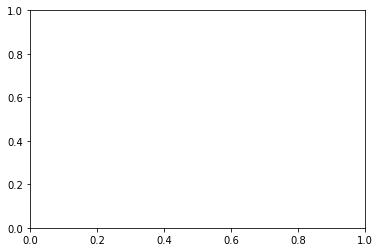

In [0]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", prob)

Maximum predicted probability 0.8990965658995651


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


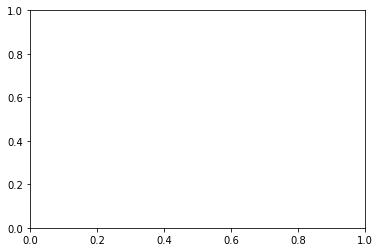

In [0]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.amax(prob))

As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn mean smaller coefficients, which means raw model outputs closer to zero, and thus, probabiities closer to 0.5 after the raw model output is squashed through the sigmoid function.

smaller C > more regularization > smaller coefficients > raw outputs closer to zero

**Visualizing easy and difficult examples**

In this exercise, you'll visualize the examples that the logistic regression model is most, and least, confident about by looking at the largest, and smallest, predicted probabilities.

The handwritten digits dataset is already loaded into the variables X and y. The show_digit function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

In [0]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
print("X shape ", X.shape)
print("y shape", y.shape)

X shape  (1797, 64)
y shape (1797,)


In [0]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

In [0]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))
proba_inds

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([1660, 1628, 1658, ...,  565, 1051,  646])

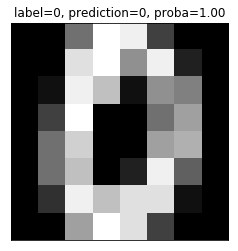

In [0]:
# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

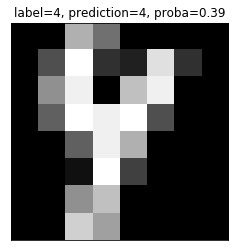

In [0]:
# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

#### Multi-class logistic regression

In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into `X_train, y_train, X_test`, and `y_test`.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=450, random_state=42)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (1347, 64)
X_test shape (450, 64)


In [0]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


OVR training accuracy: 0.9948032665181886
OVR test accuracy    : 0.9666666666666667


In [0]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9733333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


**Visualizing multi-class logistic regression**

In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into X_train and y_train. The two logistic regression objects,lr_mn and lr_ovr, are already instantiated (with C=100), fit, and plotted.

Notice that lr_ovr never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

Softmax     training accuracy: 1.0
One-vs-rest training accuracy: 0.9948032665181886


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


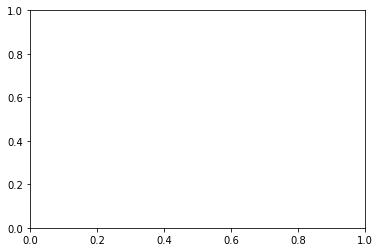

In [0]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

**One-vs-rest SVM**

Instead of using LinearSVC, we'll now use scikit-learn's SVC object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

In [0]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


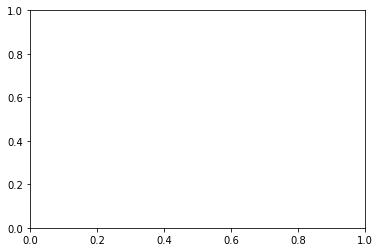

In [0]:
# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

## 4. Support Vector Machines

#### Support vectors

Support vectors are defined as training examples that influence the decision boundary. 

In this exercise, you'll observe this behaviour by removing non-support vectors from the training set.

In [0]:
wine = datasets.load_wine()

X = wine.data[:, :2]
print(X.shape)
y = wine.target
print(y.shape)

(178, 2)
(178,)




*   Train a linear SVM on the whole data set.

*   Create a new data set containing only the support vectors.

*   Train a new linear SVM on the smaller data set.




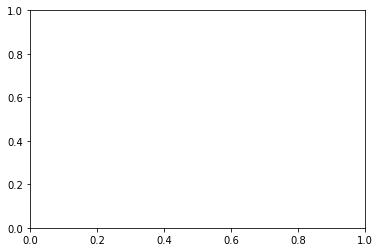

In [0]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

*svm.support_ returns the indices of the support vectors of the model  svm. You can use this to directly index into X and y and return subsets containly only those examples. For example, X[svm.support_].*

In [0]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

Number of original examples 178
Number of support vectors 81


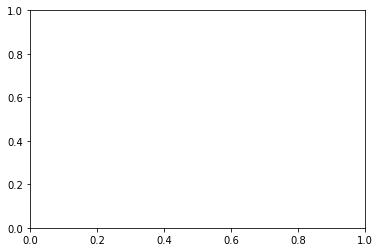

In [0]:
# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

#### Kernel SVMs

**GridSearchCV warm-up**

Larger values of gamma are better for training accuracy, but cross-validation helped us find something different (and better).

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Jointly tuning gamma and C with GridSearchCV**

In this exercise you'll search for the best combination of C and gamma using `GridSearchCV`.

As in the previous exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables `X_train, y_train, X_test`, and `y_test`. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.



*   Run `GridSearchCV` to find the best hyperparameters using the training set.

*   Print the best values of the parameters.

*   Print out the accuracy on the test set, which was not used during the cross-validation procedure.



In [0]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=899, random_state=42)

print("digits dataset train set:", X_train.shape)
print("digits dataset test set:", X_test.shape)

digits dataset train set: (898, 64)
digits dataset test set: (899, 64)


In [0]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9810690423162584


In [0]:
# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Test accuracy of best grid search hypers: 0.9877641824249166


#### Comparing logistic regression and SVM ( and beyond)

**An advantage of SVMs over logistic regression**

Having a limited number of support vectors makes kernel SVMs computationally efficient.

**An advantage of logistic regression over SVMs**

It natually outputs meaningful probabilities.

**Using SGD Classifier**

In this final coding exercise, you'll do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using SGDClassifier().

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

In [0]:
# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.9432071269487751
Test accuracy of best grid search hypers: 0.9276974416017798


**An advantage of SGDClassifier: **

it is very fast - this would have taken a lot longer with LogisticRegression() or LinearSVC()